<a href="https://colab.research.google.com/github/elangbijak4/Sistem-Cerdas/blob/main/Computer_Vision_sebagai_sistem_cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


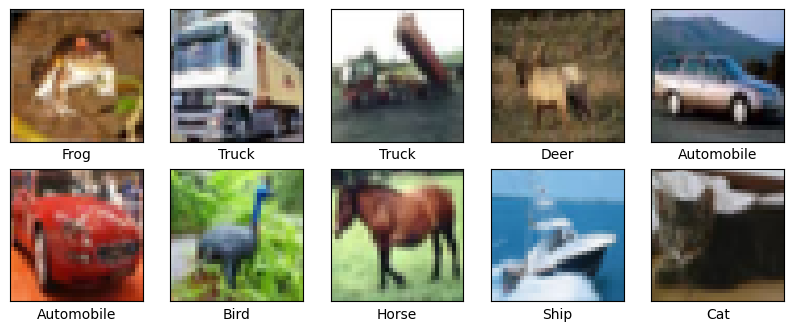

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3490 - loss: 1.7537 - val_accuracy: 0.5443 - val_loss: 1.2622
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 49ms/step - accuracy: 0.5734 - loss: 1.2008 - val_accuracy: 0.6329 - val_loss: 1.0411
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6419 - loss: 1.0230 - val_accuracy: 0.6545 - val_loss: 0.9892
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6833 - loss: 0.9113 - val_accuracy: 0.6777 - val_loss: 0.9196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.7086 - loss: 0.8331 - val_accuracy: 0.6899 - val_loss: 0.8891
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7264 - loss: 0.7857 - val_accuracy: 0.6904 - val_loss: 0.9061
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7463 - loss: 0.7259 - val_accuracy: 0.6964 - val_loss: 0.8847
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7652 

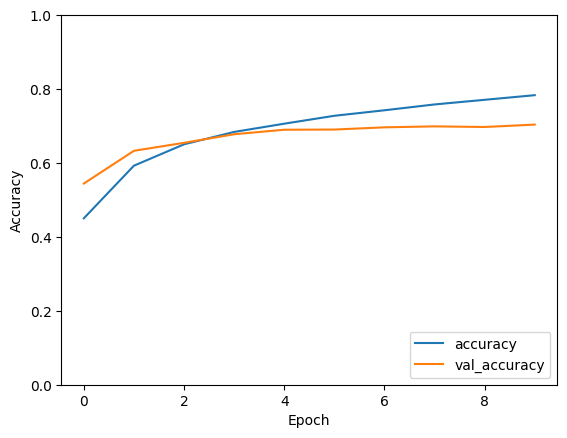

313/313 - 4s - 11ms/step - accuracy: 0.7038 - loss: 0.9027

Test accuracy: 0.704
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


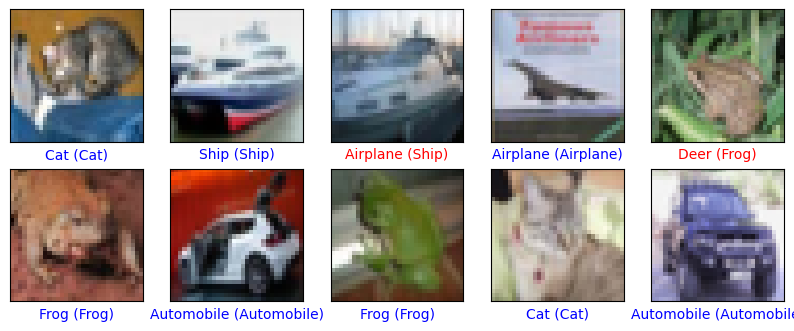

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for easy interpretation
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize the first 10 images in the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.3f}')

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Display some predictions with images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[predictions[i].argmax()]
    true_label = class_names[test_labels[i][0]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()
